In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import Map, CircleMarker, Vega, Popup,IFrame
import base64
from rpy2.robjects import r, numpy2ri
from rpy2.robjects import numpy2ri
numpy2ri.activate()
from rpy2.robjects.packages import importr
sinkr = importr('sinkr')

# Read data

In [2]:
data=pd.read_csv('v100_hr_20200101-0930_cut_utf8.csv')

In [4]:
###
#cal_PMf  
###
u=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    u[i]=a.T
###
#obs_PMf
###
v=np.zeros([244,6816])
for i in range (0,244):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    v[i]=a.T
###
#station
###
station=np.zeros([71,2])
for i in range (0,71):
    station[i][0]=np.array(data['lat'][96*i])
    station[i][1]=np.array(data['lon'][96*i])
# u=u.T
# print(station)

print(np.shape(station))
print(np.shape(u))
print(np.shape(v))

(71, 2)
(244, 6816)
(244, 6816)


# DINEOF (like FPCA)

In [5]:
XRestruct=sinkr.dineof(u)
YRestruct=sinkr.dineof(v)

[1]
 "1 EOF ; RMS = 10.69468408"


[1]
 "1 EOF ; RMS = 10.6871889"


[1]
 "1 EOF ; RMS = 10.68714113"


[1]
 "1 EOF ; RMS = 10.68709551"


[1]
 "1 EOF ; RMS = 10.68707921"


[1]
 "1 EOF ; RMS = 10.68707368"


[1]
 "2 EOF ; RMS = 9.88713128"


[1]
 "2 EOF ; RMS = 9.88634394"


[1]
 "2 EOF ; RMS = 9.88628814"


[1]
 "2 EOF ; RMS = 9.88627337"


[1]
 "2 EOF ; RMS = 9.88626809"


[1]
 "3 EOF ; RMS = 9.49728455"


[1]
 "3 EOF ; RMS = 9.49562524"


[1]
 "3 EOF ; RMS = 9.49596802"


[1]
 "4 EOF ; RMS = 9.21420793"


[1]
 "4 EOF ; RMS = 9.21745479"


[1]
 "5 EOF ; RMS = 9.05373649"


[1]
 "5 EOF ; RMS = 9.06480881"


[1]
 "6 EOF ; RMS = 8.92171398"


[1]
 "6 EOF ; RMS = 8.93034155"


[1]
 "7 EOF ; RMS = 8.87057451"


[1]
 "7 EOF ; RMS = 8.89094421"


[1]
 "8 EOF ; RMS = 8.84261836"


[1]
 "8 EOF ; RMS = 8.8831164"


[1]
 "9 EOF ; RMS = 8.81239226"


[1]
 "9 EOF ; RMS = 8.83846853"


[1]
 "10 EOF ; RMS = 8.78868818"


[1]
 "10 EOF ; RMS = 8.80358377"


[1]
 "11 EOF ; RMS = 8.72394936"


[1]
 "1

# Restruct Function

In [6]:
XRestruct_Fun=np.array(XRestruct[0])
YRestruct_Fun=np.array(YRestruct[0])
XCov_fun=np.cov(XRestruct_Fun.T)
XMean_fun=np.zeros(6816)
YMean_fun=np.zeros(6816)
for i in range(0,6816):
    for j in range(0,244):
        XMean_fun[i]=XMean_fun[i]+(XRestruct_Fun[j][i]/244)
        YMean_fun[i]=YMean_fun[i]+(YRestruct_Fun[j][i]/244)
print(type(XRestruct_Fun))
print(type(YRestruct_Fun))
print(np.shape(XRestruct_Fun))
print(np.shape(YRestruct_Fun))
print(np.shape(XCov_fun))
print(np.shape(XMean_fun))
print(np.shape(YMean_fun))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(244, 6816)
(244, 6816)
(6816, 6816)
(6816,)
(6816,)


In [7]:
Xhat=XRestruct_Fun
Yhat=YRestruct_Fun
Xbar=XMean_fun
Ybar=YMean_fun
print('Xhat')
#print(Xhat)
print(np.shape(Xhat))
print('Yhat')
#print(Yhat)
print(np.shape(Yhat))
print('Xbar')
#print(Xbar)
print(np.shape(Xbar))
print('Ybar')
#print(Ybar)
print(np.shape(Ybar))

Xhat
(244, 6816)
Yhat
(244, 6816)
Xbar
(6816,)
Ybar
(6816,)


# Regression

In [8]:
G_xx=XCov_fun
G_xxt=np.zeros(6816)
for i in range(0,6816):
     G_xxt[i]=G_xx[i][i]
print(G_xxt)
print(np.shape(G_xxt))

G_xy=0
for i in range (0,244):
    G_xyi=(Xhat[i]-Xbar)*(Yhat[i]-Ybar)
    G_xy=G_xy+G_xyi
G_xy=G_xy/243
print(G_xy)
print(np.shape(G_xy))

[ 68.15802914  63.24933945 116.31025274 ...  98.99547747 118.30559943
 139.82751368]
(6816,)
[40.62269543 41.52538178 47.96212717 ... 42.24990974 51.83098408
 68.45980743]
(6816,)


In [9]:
B_1=G_xy/G_xxt
B_0=YMean_fun-(B_1*XMean_fun)
B_1const=0
for i in range (0,6816):
    B_1const=B_1const+B_1[i]
B_1const=B_1const/6816

print('B_1')
#print(B_1)
print(np.shape(B_1))
print('B_0')
#print(B_0)
print(np.shape(B_0))
print('B_1const')
#print(B_1const)
print(np.shape(B_1const))

B_1
(6816,)
B_0
(6816,)
B_1const
()


# output cvs

In [11]:
#Y
before_fx=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    before_fx[i]=a
print(np.shape(before_fx))
after_fx_r=sinkr.dineof(before_fx)
after_fx=np.array(after_fx_r[0])
print(np.shape(after_fx))
fit_fx=B_0+(B_1*after_fx)
print(np.shape(fit_fx))
#------
add = np.zeros(274*6816) 
for i in range (0,274):
    for j in range (0,6816):
        add[6816*i+j] = fit_fx[i][j]
c1=np.array(data['year'])
c2=np.array(data['month'])
c3=np.array(data['day'])
c4=np.array(data['hour'])
c5=np.array(data['expdate'])
c6=np.array(data['stationID'])
c7=np.array(data['lon'])
c8=np.array(data['lat'])
c9=np.array(data['af'])
c10=np.array(data['tau'])
c11=np.array(data['cal_PMf'])
c12=np.array(data['obs_PMf'])
print(np.shape(c1))
print(np.shape(c2))
print(np.shape(c3))
print(np.shape(c4))
print(np.shape(c5))
print(np.shape(c6))
print(np.shape(c7))
print(np.shape(c8))
print(np.shape(c9))
print(np.shape(c10))
print(np.shape(c11))
print(np.shape(c12))
print(np.shape(add))
add_list = pd.DataFrame(
    {'year': c1,
     'month': c2,
     'day' : c3,
     'hour' : c4,
     'expdate' : c5,
     'stationID' : c6,
     'lon' : c7,
     'lat' : c8,
     'af' : c9,
     'tau' : c10,
     'cal_PMf' : c11,
     'obs_PMf' : c12,
     'new_PMf' : add,
    })
add_list.to_csv('/home/shuanjeng/NCHU/GTx/new_v100_hr_20200101-0831.csv',index=False)

(274, 6816)
[1]
 "1 EOF ; RMS = 10.16442517"


[1]
 "1 EOF ; RMS = 10.15631039"


[1]
 "1 EOF ; RMS = 10.15640722"


[1]
 "2 EOF ; RMS = 9.35942287"


[1]
 "2 EOF ; RMS = 9.35848445"


[1]
 "2 EOF ; RMS = 9.35836746"


[1]
 "2 EOF ; RMS = 9.35833974"


[1]
 "2 EOF ; RMS = 9.35833177"


[1]
 "3 EOF ; RMS = 9.08621996"


[1]
 "3 EOF ; RMS = 9.09198046"


[1]
 "4 EOF ; RMS = 8.85143076"


[1]
 "4 EOF ; RMS = 8.85434742"


[1]
 "5 EOF ; RMS = 8.66304463"


[1]
 "5 EOF ; RMS = 8.66687786"


[1]
 "6 EOF ; RMS = 8.53039425"


[1]
 "6 EOF ; RMS = 8.53333014"


[1]
 "7 EOF ; RMS = 8.45315205"


[1]
 "7 EOF ; RMS = 8.4602179"


[1]
 "8 EOF ; RMS = 8.40308883"


[1]
 "8 EOF ; RMS = 8.41534902"


[1]
 "9 EOF ; RMS = 8.35023386"


[1]
 "9 EOF ; RMS = 8.3595081"


[1]
 "10 EOF ; RMS = 8.29330789"


[1]
 "10 EOF ; RMS = 8.30328195"


[1]
 "11 EOF ; RMS = 8.25894904"


[1]
 "11 EOF ; RMS = 8.26734523"


[1]
 "12 EOF ; RMS = 8.22856717"


[1]
 "12 EOF ; RMS = 8.24385329"


[1]
 "13 EOF ; RMS = 8.224998

In [12]:
#beta

B_0station=np.zeros([96,71])
for i in range (0,96):
    for j in range (0,71):
        B_0station[i][j]=B_0[i+(96*j)]

B_1station=np.zeros([96,71])
for i in range (0,96):
    for j in range (0,71):
        B_1station[i][j]=B_1[i+(96*j)]

stationID=np.array(data['stationID'][:6816])
s=[]
for i in range(0,71):
    s.append(stationID[96*i])
#print(s)

beta0 = pd.DataFrame(data=B_0station,columns=s)
beta0.to_csv('/home/shuanjeng/NCHU/GTx/beta0.csv',index=False)

beta1 = pd.DataFrame(data=B_1station,columns=s)
beta1.to_csv('/home/shuanjeng/NCHU/GTx/beta1.csv',index=False)

## 畫Y^hat-Y(Residual)圖

In [10]:
Y_hat=np.zeros([244,6816])
Y_hat=B_0+B_1*Xhat
print(np.shape(Y_hat))
R=Y_hat-Yhat
print(np.shape(R))

YR=np.zeros([71,96*244])
for i in range(0,71):
    for j in range(0,244):
        for k in range(i*96,(i+1)*96):
            YR[i][j*96+(k-(i*96))]=R[j][k]
print(np.shape(YR))

mResidual=0
for i in range(0,71):
    for j in range(0,23424):
        k=abs(YR[i][j])
        mResidual=mResidual+k
mResidual=mResidual/23424/71
print("Mean Residual (abs) : %f" %mResidual)

mResidual=0
for i in range(0,71):
    for j in range(0,23424):
        k=YR[i][j]
        mResidual=mResidual+k
print("Total Residual : %.20f" %mResidual)
mResidual=mResidual/23424/71
print("Mean Residual : %.20f" %mResidual)
# print(YR)

(244, 6816)
(244, 6816)
(71, 23424)
Mean Residual (abs) : 6.762701
Total Residual : 0.00000000758497975539
Mean Residual : 0.00000000000000456074


In [11]:
# m = folium.Map(location=[23.9688, 120.9679],zoom_start=7.4)

# for i in range (0,71):
#     fig=plt.figure(i)
#     plt.plot(YR[i] , label = 'Y Residual')
#     plt.legend(loc = 2)
#     plt.title('Y Residual')
#     stationn = 'B_1plot'
#     resolution, width, height = 75, 7, 4
#     png = 'mpld3_{}.png'.format(stationn)
#     fig.savefig(png, dpi=resolution)
#     encoded = base64.b64encode(open(png, 'rb').read()).decode()
#     html = '<img src="data:image/png;base64,{}">'.format
#     iframe = IFrame(html(encoded), width=(width*resolution)+20, height=(height*resolution)+20)
#     popup = folium.Popup(iframe, max_width=450)
#     icon = folium.Icon(color="red")
#     marker = folium.Marker(location=[station[i][0], station[i][1]], popup=popup)
#     marker.add_to(m)
# m

## 畫 B_1 、const B_1 圖

In [14]:
# B_1constp=np.zeros(6816)
# for i in range(6816):
#     B_1constp[i]=B_1const

# B_1r=np.zeros(6816)
# mResidual=0
# for i in range(6816):
#     B_1r[i]=B_1[i]-B_1const
#     mResidual=mResidual+abs(B_1r[i])
# mResidual=mResidual/6816

# B_1station=np.zeros([71,96])
# for i in range (0,71):
#     for j in range (0,96):
#         B_1station[i][j]=B_1[(71*i)+j]

# B_1sconstp=np.zeros(96)
# for i in range(96):
#     B_1sconstp[i]=B_1const

In [22]:
# print("Mean Residual : %f" %mResidual)
# fig1 = plt.figure(1)
# plt.plot(B_1r,'o')
# plt.title('B_1 Residual')

# fig2 = plt.figure(2)
# plt.plot(B_1, label = 'B_1')
# plt.plot(B_1constp, label ='B_1const')
# plt.legend(loc = 1)
# plt.title('different B_1')

# plt.show()

In [23]:
# print(np.shape(station))
# print(station)

In [24]:
# m = folium.Map(location=[23.9688, 120.9679],zoom_start=7.4)
# # 將資料點加到地圖上
# for i in range (0,71):
#     folium.CircleMarker(
#         location=[station[i][0],station[i][1]],
#          radius=15,
#         popup=[i],
#         color='#3186cc',
#         fill=True,
#         fill_color='#3186cc'
#     ).add_to(m)
# m

In [12]:
# from folium.plugins import HeatMap

# fmap = folium.Map(location=[23.9688, 120.9679], zoom_start=7.4)
# # 建立資料
# data=np.zeros([71,3])
# for i in range (0,71):
#     for j in range (0,2):
#         data[i][j] = station[i][j]
# for i in range (0,71):
#     data[i][2]= B_1station[i][0]
# # print(np.shape(data))
# # print(data)
# fmap.add_child(HeatMap(data=data))

# Generate Calibrating Data

In [13]:
before_fx=np.zeros([274,6816])
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=np.nan
    before_fx[i]=a
print(np.shape(before_fx))

(274, 6816)


In [14]:
after_fx_r=sinkr.dineof(before_fx)
after_fx=np.array(after_fx_r[0])
print(np.shape(after_fx))

[1]
 "1 EOF ; RMS = 10.36300801"


[1]
 "1 EOF ; RMS = 10.34639643"


[1]
 "1 EOF ; RMS = 10.34600749"


[1]
 "1 EOF ; RMS = 10.34606841"


[1]
 "2 EOF ; RMS = 9.52258509"


[1]
 "2 EOF ; RMS = 9.52129119"


[1]
 "2 EOF ; RMS = 9.52134899"


[1]
 "3 EOF ; RMS = 9.20379791"


[1]
 "3 EOF ; RMS = 9.20409469"


[1]
 "4 EOF ; RMS = 8.94691322"


[1]
 "4 EOF ; RMS = 8.95033857"


[1]
 "5 EOF ; RMS = 8.79567506"


[1]
 "5 EOF ; RMS = 8.80823921"


[1]
 "6 EOF ; RMS = 8.69802313"


[1]
 "6 EOF ; RMS = 8.70806719"


[1]
 "7 EOF ; RMS = 8.57807624"


[1]
 "7 EOF ; RMS = 8.58353498"


[1]
 "8 EOF ; RMS = 8.44445289"


[1]
 "8 EOF ; RMS = 8.44000486"


[1]
 "8 EOF ; RMS = 8.44777737"


[1]
 "9 EOF ; RMS = 8.37467885"


[1]
 "9 EOF ; RMS = 8.38783127"


[1]
 "10 EOF ; RMS = 8.34520681"


[1]
 "10 EOF ; RMS = 8.36103683"


[1]
 "11 EOF ; RMS = 8.30773325"


[1]
 "11 EOF ; RMS = 8.31702752"


[1]
 "12 EOF ; RMS = 8.29205312"


[1]
 "12 EOF ; RMS = 8.30726623"


[1]
 "13 EOF ; RMS = 8.31037202"


(27

In [15]:
fit_fx=B_0+(B_1*after_fx)
print(np.shape(fit_fx))
fit_fxC=B_0+(B_1const*after_fx)
print(np.shape(fit_fxC))

(274, 6816)
(274, 6816)


# Compare

In [17]:
old_x=np.zeros([274,6816])
old_y=np.zeros([274,6816])
#data_cal
for i in range (0,274):
    a=np.array(data['cal_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_x[i]=a
#data_obs
for i in range (0,274):
    a=np.array(data['obs_PMf'][6816*i:6816*i+6816])
    for j in range(0,6816):
        if a[j]=='\\N' :
            a[j]=0
    old_y[i]=a
#Delete missing data
for i in range(0,274):
    for j in range(6816):
        if old_x[i][j]==0:
            old_y[i][j]=0
            fit_fx[i][j]=0
            fit_fxC[i][j]=0
        if old_y[i][j]==0:
            old_x[i][j]=0
            fit_fx[i][j]=0
            fit_fxC[i][j]=0
print(np.shape(old_x))
print(np.shape(old_y))
print(np.shape(fit_fx))
print(np.shape(fit_fxC))

(274, 6816)
(274, 6816)
(274, 6816)
(274, 6816)


## 總MADE

(i) Compare January to August (training data set)

In [18]:
before_error1=0
after_error1=0
after_errorC1=0
for i in range (0,244):
    for j in range(0,6816):
        before_error1=before_error1+abs(old_x[i][j]-old_y[i][j])
        after_error1=after_error1+abs(fit_fx[i][j]-old_y[i][j])
        after_errorC1=after_errorC1+abs(fit_fxC[i][j]-old_y[i][j])
before_error1=before_error1/244/6816
after_error1=after_error1/244/6816
after_errorC1=after_errorC1/244/6816
print("January to August (training data set) before_error: %f" %before_error1)
print("January to August (training data set) after_error: %f" %after_error1)
print("January to August (training data set with const B_1) after_error: %f" %after_errorC1)

January to August (training data set) before_error: 7.961740
January to August (training data set) after_error: 6.546755
January to August (training data set with const B_1) after_error: 6.899501


(ii) Compare September (testing data set)

In [19]:
before_error2=0
after_error2=0
after_errorC2=0
for i in range (244,274):
    for j in range(0,6816):
        before_error2=before_error2+abs(old_x[i][j]-old_y[i][j])
        after_error2=after_error2+abs(fit_fx[i][j]-old_y[i][j])
        after_errorC2=after_errorC2+abs(fit_fxC[i][j]-old_y[i][j])
before_error2=before_error2/30/6816
after_error2=after_error2/30/6816
after_errorC2=after_errorC2/30/6816
print("September (testing data set) before_error: %f" %before_error2)
print("September (testing data set) after_error: %f" %after_error2)
print("September (testing data set with const B_1) after_error: %f" %after_errorC2)

September (testing data set) before_error: 7.356276
September (testing data set) after_error: 5.728221
September (testing data set with const B_1) after_error: 5.925440


## MADE with days (以預測日來看)

(i) Compare January to August (training data set)

In [20]:
caldays_before_error1=np.zeros(244)
caldays_after_error1=np.zeros(244)
caldays_after_errorC1=np.zeros(244)
error1=0
error2=0
error3=0
for i in range (0,244):
    for j in range(0,6816):
        error1=error1+abs(old_x[i][j]-old_y[i][j])
        error2=error2+abs(fit_fx[i][j]-old_y[i][j])
        error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    caldays_before_error1[i]=error1/6816
    caldays_after_error1[i]=error2/6816
    caldays_after_errorC1[i]=error3/6816
    error1=0
    error2=0
    error3=0

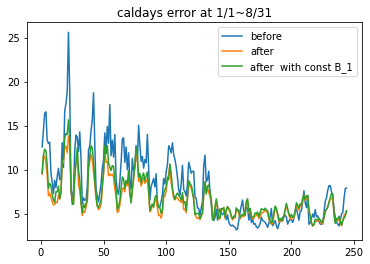

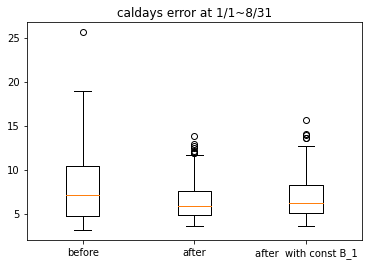

In [21]:
fig1 = plt.figure(1)
x=np.linspace(1,244,244)
plt.plot(x,caldays_before_error1, label = 'before')
plt.plot(x,caldays_after_error1, label ='after')
plt.plot(x,caldays_after_errorC1, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('caldays error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([caldays_before_error1,caldays_after_error1,caldays_after_errorC1], labels=('before','after','after  with const B_1'))
plt.title("caldays error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [22]:
caldays_before_error2=np.zeros(30)
caldays_after_error2=np.zeros(30)
caldays_after_errorC2=np.zeros(30)
error1=0
error2=0
error3=0
for i in range (244,274):
    for j in range(0,6816):
        error1=error1+abs(old_x[i][j]-old_y[i][j])
        error2=error2+abs(fit_fx[i][j]-old_y[i][j])
        error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    caldays_before_error2[i-244]=error1/6816
    caldays_after_error2[i-244]=error2/6816
    caldays_after_errorC2[i-244]=error3/6816
    error1=0
    error2=0
    error3=0

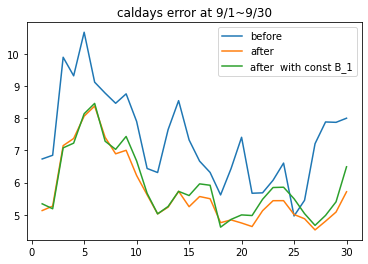

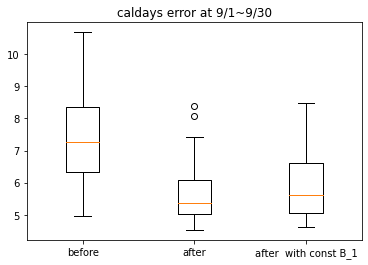

In [23]:
fig1 = plt.figure(1)
x=np.linspace(1,30,30)
plt.plot(x,caldays_before_error2, label = 'before')
plt.plot(x,caldays_after_error2, label ='after')
plt.plot(x,caldays_after_errorC2, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('caldays error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([caldays_before_error2,caldays_after_error2,caldays_after_errorC2], labels=('before','after','after  with const B_1'))
plt.title("caldays error at 9/1~9/30")

plt.show()

## MADE with cal after how much days (以對第幾天後的預測來看)

(i) Compare January to August (training data set)

In [24]:
days_before_error1=np.zeros(4)
days_after_error1=np.zeros(4)
days_after_errorC1=np.zeros(4)
error1=0
error2=0
error3=0
for k in range(0,4):
    for i in range (0,244):
        for j in range(0,71):
            for l in range(24*k,24*(k+1)):
                error1=error1+abs(old_x[i][(j*96)+l]-old_y[i][(j*96)+l])
                error2=error2+abs(fit_fx[i][(j*96)+l]-old_y[i][(j*96)+l])
                error3=error3+abs(fit_fxC[i][(j*96)+l]-old_y[i][(j*96)+l])
    days_before_error1[k]=error1/244/71/24
    days_after_error1[k]=error2/244/71/24
    days_after_errorC1[k]=error3/244/71/24
    error1=0
    error2=0
    error3=0
print(days_before_error1)
print(days_after_error1)
print(days_after_errorC1)

[6.98159512 7.78522267 8.36345499 8.71668718]
[5.88921912 6.53458409 6.81267774 6.95053733]
[6.29017386 6.74750324 7.15327568 7.4070497 ]


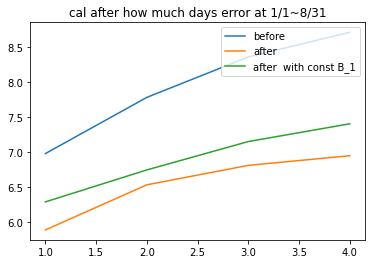

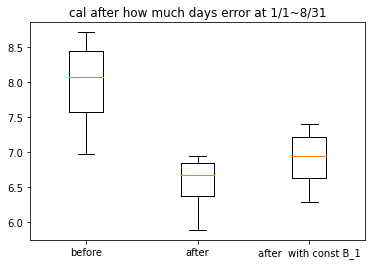

In [25]:
fig1 = plt.figure(1)
x=np.linspace(1,4,4)
plt.plot(x,days_before_error1, label = 'before')
plt.plot(x,days_after_error1, label ='after')
plt.plot(x,days_after_errorC1, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('cal after how much days error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([days_before_error1,days_after_error1,days_after_errorC1], labels=('before','after','after  with const B_1'))
plt.title("cal after how much days error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [26]:
days_before_error2=np.zeros(4)
days_after_error2=np.zeros(4)
days_after_errorC2=np.zeros(4)
error1=0
error2=0
error3=0
for k in range(0,4):
    for i in range (244,274):
        for j in range(0,71):
            for l in range(24*k,24*(k+1)):
                error1=error1+abs(old_x[i][(j*96)+l]-old_y[i][(j*96)+l])
                error2=error2+abs(fit_fx[i][(j*96)+l]-old_y[i][(j*96)+l])
                error3=error3+abs(fit_fxC[i][(j*96)+l]-old_y[i][(j*96)+l])
    days_before_error2[k]=error1/30/71/24
    days_after_error2[k]=error2/30/71/24
    days_after_errorC2[k]=error3/30/71/24
    error1=0
    error2=0
    error3=0
print(days_before_error2)
print(days_after_error2)
print(days_after_errorC2)

[6.26227711 7.17784407 7.78812266 8.19685939]
[5.17932173 5.67829853 5.96335025 6.09191507]
[5.48535995 5.76702112 6.10503889 6.34433872]


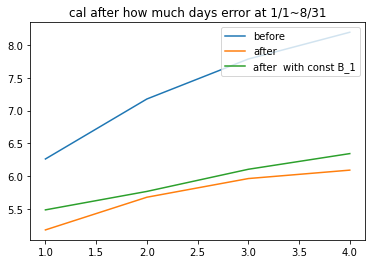

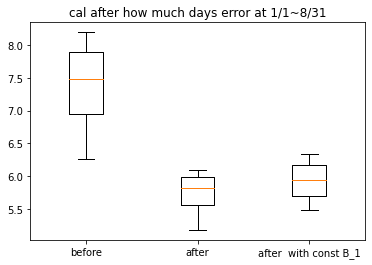

In [27]:
fig1 = plt.figure(1)
x=np.linspace(1,4,4)
plt.plot(x,days_before_error2, label = 'before')
plt.plot(x,days_after_error2, label ='after')
plt.plot(x,days_after_errorC2, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('cal after how much days error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([days_before_error2,days_after_error2,days_after_errorC2], labels=('before','after','after  with const B_1'))
plt.title("cal after how much days error at 1/1~8/31")

plt.show()

## MADE with cal after how much hours (以對第幾小時後的預測來看)

(i) Compare January to August (training data set)

In [28]:
hours_before_error1=np.zeros(96)
hours_after_error1=np.zeros(96)
hours_after_errorC1=np.zeros(96)
error1=0
error2=0
error3=0
for k in range(0,96):
    for i in range (0,244):
        for j in range(0,71):
            error1=error1+abs(old_x[i][(j*96)+k]-old_y[i][(j*96)+k])
            error2=error2+abs(fit_fx[i][(j*96)+k]-old_y[i][(j*96)+k])
            error3=error3+abs(fit_fxC[i][(j*96)+k]-old_y[i][(j*96)+k])
    hours_before_error1[k]=error1/244/71
    hours_after_error1[k]=error2/244/71
    hours_after_errorC1[k]=error3/244/71
    error1=0
    error2=0
    error3=0
# print(hours_before_error1)
# print(hours_after_error1)
# print(hours_after_errorC1)

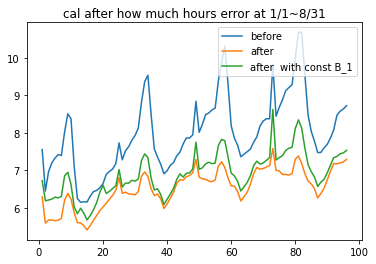

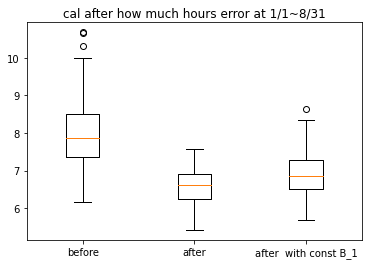

In [29]:
fig1 = plt.figure(1)
x=np.linspace(1,96,96)
plt.plot(x,hours_before_error1, label = 'before')
plt.plot(x,hours_after_error1, label ='after')
plt.plot(x,hours_after_errorC1, label ='after  with const B_1')
plt.legend(loc = 1)
plt.title('cal after how much hours error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([hours_before_error1,hours_after_error1,hours_after_errorC1], labels=('before','after','after  with const B_1'))
plt.title("cal after how much hours error at 1/1~8/31")

plt.show()

(ii) Compare September (testing data set)

In [30]:
hours_before_error2=np.zeros(96)
hours_after_error2=np.zeros(96)
hours_after_errorC2=np.zeros(96)
error1=0
error2=0
error3=0
for k in range(0,96):
    for i in range (244,274):
        for j in range(0,71):
            error1=error1+abs(old_x[i][(j*96)+k]-old_y[i][(j*96)+k])
            error2=error2+abs(fit_fx[i][(j*96)+k]-old_y[i][(j*96)+k])
            error3=error3+abs(fit_fxC[i][(j*96)+k]-old_y[i][(j*96)+k])
    hours_before_error2[k]=error1/30/71
    hours_after_error2[k]=error2/30/71
    hours_after_errorC2[k]=error3/30/71
    error1=0
    error2=0
    error3=0
# print(hours_before_error2)
# print(hours_after_error2)
# print(hours_after_errorC2)

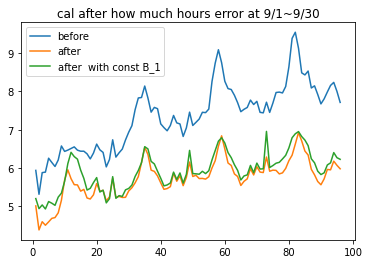

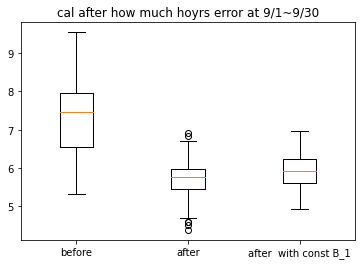

In [31]:
fig1 = plt.figure(1)
x=np.linspace(1,96,96)
plt.plot(x,hours_before_error2, label = 'before')
plt.plot(x,hours_after_error2, label ='after')
plt.plot(x,hours_after_errorC2, label ='after  with const B_1')
plt.legend(loc = 2)
plt.title('cal after how much hours error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([hours_before_error2,hours_after_error2,hours_after_errorC2], labels=('before','after','after  with const B_1'))
plt.title("cal after how much hoyrs error at 9/1~9/30")

plt.show()

## MADE with station (以測站來看)

(i) Compare January to August (training data set)

In [32]:
station_before_error1=np.zeros(71)
station_after_error1=np.zeros(71)
station_after_errorC1=np.zeros(71)
error1=0
error2=0
error3=0
for k in range(0,71):
    for i in range (0,244):
        for j in range(96*k,96*(k+1)):
            error1=error1+abs(old_x[i][j]-old_y[i][j])
            error2=error2+abs(fit_fx[i][j]-old_y[i][j])
            error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    station_before_error1[k]=error1/244/96
    station_after_error1[k]=error2/244/96
    station_after_errorC1[k]=error3/244/96
    error1=0
    error2=0
    error3=0

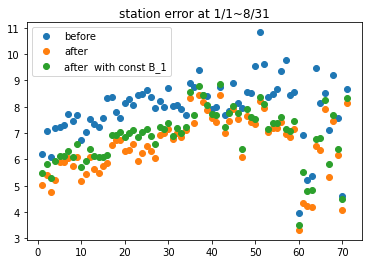

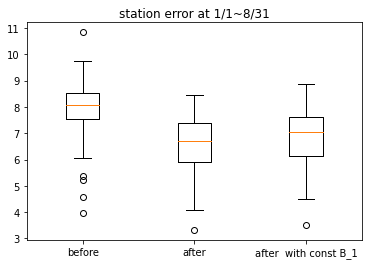

In [33]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,station_before_error1,'o', label = 'before')
plt.plot(x,station_after_error1,'o', label ='after')
plt.plot(x,station_after_errorC1, 'o',label ='after  with const B_1')
plt.legend(loc = 2)
plt.title('station error at 1/1~8/31')

fig2 = plt.figure(2)
plt.boxplot([station_before_error1,station_after_error1,station_after_errorC1], labels=('before','after','after  with const B_1'))
plt.title("station error at 1/1~8/31")

plt.show()

In [34]:
station_error1=station_before_error1+station_after_error1+station_after_errorC1
x1=np.zeros(5)
for i in range (0,5):
    x1[i]=sorted(station_error1)[70-i]
# print(x1)
y1=np.zeros(5)
for i in range (0,5):
    for j in range(0,71):
        if station_error1[j]==x1[i]:
            y1[i]=j+1
print(y1)

[51. 37. 42. 35. 52.]


In [35]:
station_before_error1_new=np.zeros(71)
station_after_error1_new=np.zeros(71)
station_after_errorC1_new=np.zeros(71)
error1=0
error2=0
error3=0
for k in range(0,71):
    for i in range (0,244):
        for j in range(96*k,96*(k+1)):
            error1=error1+(old_x[i][j]-old_y[i][j])
            error2=error2+(fit_fx[i][j]-old_y[i][j])
            error3=error3+(fit_fxC[i][j]-old_y[i][j])
    station_before_error1_new[k]=error1/244/96
    station_after_error1_new[k]=error2/244/96
    station_after_errorC1_new[k]=error3/244/96
    error1=0
    error2=0
    error3=0

# print(station_before_error1_new)
# print(station_after_error1_new)
# print(station_after_errorC1_new)
# print(sorted(station_before_error1_new))
# print(sorted(station_after_error1_new))
# print(sorted(station_after_errorC1_new))

x11p=np.zeros(5)
x12p=np.zeros(5)
x13p=np.zeros(5)
x11n=np.zeros(5)
x12n=np.zeros(5)
x13n=np.zeros(5)
for i in range (0,5):
    x11p[i]=sorted(station_before_error1_new)[70-i]
    x12p[i]=sorted(station_after_error1_new)[70-i]
    x13p[i]=sorted(station_after_errorC1_new)[70-i]
    x11n[i]=sorted(station_before_error1_new)[i]
    x12n[i]=sorted(station_after_error1_new)[i]
    x13n[i]=sorted(station_after_errorC1_new)[i]
# print(x11p)
# print(x12p)
# print(x13p)
# print(x11n)
# print(x12n)
# print(x13n)
y11p=np.zeros(5)
y12p=np.zeros(5)
y13p=np.zeros(5)
y11n=np.zeros(5)
y12n=np.zeros(5)
y13n=np.zeros(5)
for i in range (0,5):
    for j in range(0,71):
        if station_before_error1_new[j]==x11p[i]:
            y11p[i]=j+1
        if station_after_error1_new[j]==x12p[i]:
            y12p[i]=j+1
        if station_after_errorC1_new[j]==x13p[i]:
            y13p[i]=j+1
        if station_before_error1_new[j]==x11n[i]:
            y11n[i]=j+1
        if station_after_error1_new[j]==x12n[i]:
            y12n[i]=j+1
        if station_after_errorC1_new[j]==x13n[i]:
            y13n[i]=j+1
print(y11p)
print(y12p)
print(y13p)
print(y11n)
print(y12n)
print(y13n)

[57. 50. 56. 51. 58.]
[70. 26. 35. 66. 28.]
[61. 23. 24.  4. 14.]
[64. 45. 16. 71. 46.]
[18. 12. 61. 19. 46.]
[42. 66. 38. 37. 39.]


In [36]:
print("取絕對值後誤差總和最高的五個站：大寮、斗六、嘉義、二林、林園")
print("舊預報誤差最高估的五個站：小港、鳳山、前鎮、大寮、屏東")
print("新預報誤差最高估的五個站： 富貴角、苗栗、二林、竹山、豐原")
print("新預報用常數B誤差最高估的五個站： 陽明、竹東、新竹、新店、古亭")
print("舊預報誤差最低估的五個站： 三重、安南、大同、麥寮、臺南")
print("新預報誤差最低估的五個站： 大園、中山、陽明、觀音、沙鹿")
print("新預報用常數B誤差最低估的五個站：嘉義、竹山、崙背、斗六、新港")

取絕對值後誤差總和最高的五個站：大寮、斗六、嘉義、二林、林園
舊預報誤差最高估的五個站：小港、鳳山、前鎮、大寮、屏東
新預報誤差最高估的五個站： 富貴角、苗栗、二林、竹山、豐原
新預報用常數B誤差最高估的五個站： 陽明、竹東、新竹、新店、古亭
舊預報誤差最低估的五個站： 三重、安南、大同、麥寮、臺南
新預報誤差最低估的五個站： 大園、中山、陽明、觀音、沙鹿
新預報用常數B誤差最低估的五個站：嘉義、竹山、崙背、斗六、新港


(ii) Compare September (testing data set)

In [37]:
station_before_error2=np.zeros(71)
station_after_error2=np.zeros(71)
station_after_errorC2=np.zeros(71)
error1=0
error2=0
error3=0
for k in range(0,71):
    for i in range (244,274):
        for j in range(96*k,96*(k+1)):
            error1=error1+abs(old_x[i][j]-old_y[i][j])
            error2=error2+abs(fit_fx[i][j]-old_y[i][j])
            error3=error3+abs(fit_fxC[i][j]-old_y[i][j])
    station_before_error2[k]=error1/30/96
    station_after_error2[k]=error2/30/96
    station_after_errorC2[k]=error3/30/96
    error1=0
    error2=0
    error3=0

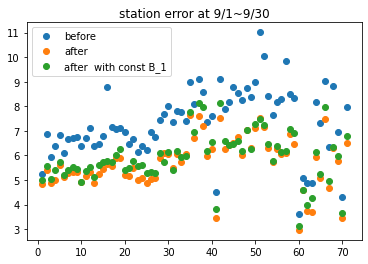

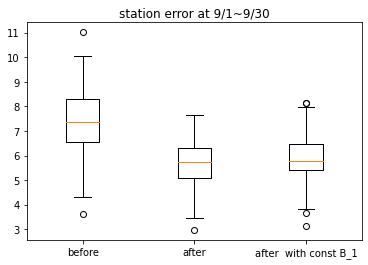

In [38]:
fig1 = plt.figure(1)
x=np.linspace(1,71,71)
plt.plot(x,station_before_error2,'o', label = 'before')
plt.plot(x,station_after_error2,'o', label ='after')
plt.plot(x,station_after_errorC2, 'o',label ='after  with const B_1')
plt.legend(loc = 2)
plt.title('station error at 9/1~9/30')

fig2 = plt.figure(2)
plt.boxplot([station_before_error2,station_after_error2,station_after_errorC2], labels=('before','after','after  with const B_1'))
plt.title("station error at 9/1~9/30")

plt.show()

In [39]:
station_error2=station_before_error2+station_after_error2+station_after_errorC2
x2=np.zeros(5)
for i in range (0,5):
    x2[i]=sorted(station_error2)[70-i]
# print(x2)
y2=np.zeros(5)
for i in range (0,5):
    for j in range(0,71):
        if station_error2[j]==x2[i]:
            y2[i]=j+1
print(y2)

[51. 37. 42. 66. 52.]


In [40]:
station_before_error2_new=np.zeros(71)
station_after_error2_new=np.zeros(71)
station_after_errorC2_new=np.zeros(71)
error1=0
error2=0
error3=0
for k in range(0,71):
    for i in range (244,274):
        for j in range(96*k,96*(k+1)):
            error1=error1+(old_x[i][j]-old_y[i][j])
            error2=error2+(fit_fx[i][j]-old_y[i][j])
            error3=error3+(fit_fxC[i][j]-old_y[i][j])
    station_before_error2_new[k]=error1/30/96
    station_after_error2_new[k]=error2/30/96
    station_after_errorC2_new[k]=error3/30/96
    error1=0
    error2=0
    error3=0

# print(station_before_error2_new)
# print(station_after_error2_new)
# print(station_after_errorC2_new)
# print(sorted(station_before_error2_new))
# print(sorted(station_after_error2_new))
# print(sorted(station_after_errorC2_new))

x21p=np.zeros(5)
x22p=np.zeros(5)
x23p=np.zeros(5)
x21n=np.zeros(5)
x22n=np.zeros(5)
x23n=np.zeros(5)
for i in range (0,5):
    x21p[i]=sorted(station_before_error2_new)[70-i]
    x22p[i]=sorted(station_after_error2_new)[70-i]
    x23p[i]=sorted(station_after_errorC2_new)[70-i]
    x21n[i]=sorted(station_before_error2_new)[i]
    x22n[i]=sorted(station_after_error2_new)[i]
    x23n[i]=sorted(station_after_errorC2_new)[i]
# print(x21p)
# print(x22p)
# print(x23p)
# print(x21n)
# print(x22n)
# print(x23n)
y21p=np.zeros(5)
y22p=np.zeros(5)
y23p=np.zeros(5)
y21n=np.zeros(5)
y22n=np.zeros(5)
y23n=np.zeros(5)
for i in range (0,5):
    for j in range(0,71):
        if station_before_error2_new[j]==x21p[i]:
            y21p[i]=j+1
        if station_after_error2_new[j]==x22p[i]:
            y22p[i]=j+1
        if station_after_errorC2_new[j]==x23p[i]:
            y23p[i]=j+1
        if station_before_error2_new[j]==x21n[i]:
            y21n[i]=j+1
        if station_after_error2_new[j]==x22n[i]:
            y22n[i]=j+1
        if station_after_errorC2_new[j]==x23n[i]:
            y23n[i]=j+1
print(y21p)
print(y22p)
print(y23p)
print(y21n)
print(y22n)
print(y23n)

[57. 29. 51. 47. 68.]
[29. 64. 63.  1.  8.]
[23. 63. 24. 29.  1.]
[16. 64. 45. 71. 66.]
[50. 38. 37. 42. 66.]
[42. 38. 37. 66. 50.]


In [41]:
print("取絕對值後誤差總和最高的五個站：大寮、斗六、嘉義、竹山、林園")
print("舊預報誤差最高估的五個站：小港、沙鹿、大寮、美濃、復興")
print("新預報誤差最高估的五個站： 沙鹿、三重、冬山、基隆、菜寮")
print("新預報用常數B誤差最高估的五個站： 竹東、冬山、新竹、沙鹿、基隆")
print("舊預報誤差最低估的五個站： 大同、三重、安南、麥寮、竹山")
print("新預報誤差最低估的五個站： 鳳山、崙背、斗六、嘉義、竹山")
print("新預報用常數B誤差最低估的五個站：嘉義、崙背、斗六、竹山、鳳山")

取絕對值後誤差總和最高的五個站：大寮、斗六、嘉義、竹山、林園
舊預報誤差最高估的五個站：小港、沙鹿、大寮、美濃、復興
新預報誤差最高估的五個站： 沙鹿、三重、冬山、基隆、菜寮
新預報用常數B誤差最高估的五個站： 竹東、冬山、新竹、沙鹿、基隆
舊預報誤差最低估的五個站： 大同、三重、安南、麥寮、竹山
新預報誤差最低估的五個站： 鳳山、崙背、斗六、嘉義、竹山
新預報用常數B誤差最低估的五個站：嘉義、崙背、斗六、竹山、鳳山
